## Fit Gauß

- create 3D Gauß-Data
- create 3D changed Gauß-Date
- fit changed 3D Gauß-Data

Gauß für y-Achsen values

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.random import randn
import numpy as np

In [2]:
def gauss_func (x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2.)

In [3]:
def gauss_func_3D (x, y,  mu_x, sig_x, mu_y, sig_y):
    return np.multiply(gauss_func(x, mu_x, sig_x),gauss_func(y, mu_y, sig_y))

create 3D Gauß data

In [4]:
N = 1000
x_werte = np.array(randn(N),dtype=np.float32)
y_werte = np.array(randn(N),dtype=np.float32)
z_werte = gauss_func_3D(x_werte, y_werte,0, 1, 0, 1)

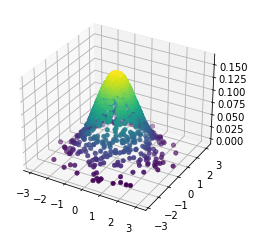

In [5]:
#plot 3D Gauß data
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte, c=z_werte, cmap='viridis', linewidth=0.5)

create 3D changed Gauß-data

In [6]:
rng = np.random.default_rng()
z_noise = 0.01 * rng.normal(size=x_werte.size)
z_werte_noisy= z_werte + z_noise

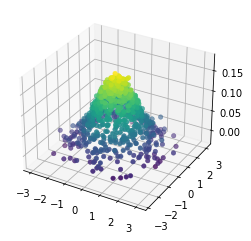

In [7]:
#plot 3D changed Gauß data
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_noisy, c=z_werte_noisy, cmap='viridis', linewidth=0.5)

fit 3D changed Gauß-data

In [8]:
#damit curve_fit nur ein independent variable object hat müssen x_werte und y_werte zu einem
#2D array zusammen geführt werden 

#zusammen führen von np.arrays
a = np.array((1,2,3))
b = np.array((2,3,4))
c = np.column_stack((a,b))
c

array([[1, 2],
       [2, 3],
       [3, 4]])

In [9]:
x_werte_y_werte = np.column_stack((x_werte,y_werte))
x_werte_y_werte

array([[-0.49891704,  0.13672103],
       [-1.1322454 , -0.06175007],
       [ 0.9349109 ,  0.7106719 ],
       ...,
       [ 0.3105957 , -0.4598871 ],
       [-0.34060726, -0.5081827 ],
       [-1.4622769 ,  2.3417583 ]], dtype=float32)

In [10]:
#in de func fuction muss aus dem 2D wieder 1D gemacht werden 

#splitten von np.arrays column wise
d, e = np.hsplit(c, 2)
d,e 
f = e.flatten()
f

array([2, 3, 4])

In [22]:
def func(x_y,  mu_x, sig_x, mu_y, sig_y):
    x, y = np.hsplit(x_y, 2)
    return gauss_func_3D(x.flatten(),y.flatten(),mu_x,sig_x,mu_y,sig_y)

In [25]:
#test func
z_werte = func(x_werte_y_werte, 0, 1, 0, 1)
z_werte

array([0.13922244, 0.08367848, 0.07986373, 0.0809691 , 0.08938867,
       0.09678949, 0.03527575, 0.10487778, 0.11528797, 0.11589079,
       0.07762176, 0.02801127, 0.13596284, 0.01248904, 0.07749991,
       0.01647018, 0.02763996, 0.1395356 , 0.00549381, 0.10719088,
       0.01667943, 0.10249278, 0.10104095, 0.08867253, 0.03624939,
       0.02165305, 0.00712378, 0.11941572, 0.14818731, 0.13249741,
       0.06985036, 0.03587628, 0.09790941, 0.13603175, 0.08237759,
       0.11635715, 0.00483185, 0.10700001, 0.14155743, 0.05869012,
       0.12371323, 0.14718798, 0.04507929, 0.14474122, 0.12382422,
       0.0432165 , 0.13476604, 0.06021541, 0.12775142, 0.13446106,
       0.08757773, 0.04105924, 0.01020855, 0.02199466, 0.13715239,
       0.00747336, 0.02182321, 0.0806852 , 0.01485823, 0.01031881,
       0.0463274 , 0.10745031, 0.05574305, 0.15547983, 0.14637843,
       0.07600722, 0.14604928, 0.09460806, 0.02917741, 0.01541206,
       0.11082387, 0.07879876, 0.15642796, 0.04390949, 0.15641

In [26]:
popt_bound, pcov = curve_fit(func, x_werte_y_werte, z_werte_noisy)
#new parameters
popt_bound

array([ 0.0068827 ,  1.00117689, -0.00158963,  1.00057602])

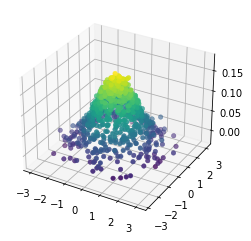

In [30]:
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_noisy, c=z_werte_noisy, cmap='viridis', linewidth=0.5)

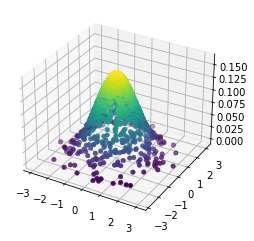

In [32]:
z_werte_fitted = gauss_func_3D(x_werte, y_werte, popt_bound[0], popt_bound[1], popt_bound[2], popt_bound[3])
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_fitted, c=z_werte_fitted, cmap='viridis', linewidth=0.5)